# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.


### Step 1: Load the python libraries you will need for this project 

In [144]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Step 2: Read in your data set 

In [145]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head(10)

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
5      1  760.0  3.00       2.0
6      1  560.0  2.98       1.0
7      0  400.0  3.08       2.0
8      1  540.0  3.39       3.0
9      0  700.0  3.92       2.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [146]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [147]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [148]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

In [9]:
print "GRE STD:"
print df_raw["gre"].std()
print "RATIO (STD / MEAN)"
print df_raw["gre"].std() / df_raw["gre"].mean()
print
print "GPA STD:"
print df_raw["gpa"].std()
print "RATIO (STD / MEAN)"
print df_raw["gpa"].std() / df_raw["gpa"].mean()

GRE STD:
115.628513092
RATIO (STD / MEAN)
0.196633687448

GPA STD:
0.380630380057
RATIO (STD / MEAN)
0.112249565618


Answer: The Standard Deviation is a measure of how spread out numbers are. A small STD means that the values of the dataset are close to the mean of the dataset. A large STD means that the values of the dataset are farther away from the mean of the dataset. The STD is usually presented together with the mean and is measured in the same units. The difference between the GRE STD and the GPA STD can be explained if we look the mean of both GRE (588.04) and GPA (3.39). Since is clear that both parameters are measured in different units we need to use the ratio (STD / Mean) to conclude which parameter has the larger STD. By looking at the values of the Ratio, we conclude that GRE has a larger STD compared to GPA and the reason for that is the fact that the numbers of GRE are more widespread and far from the mean of the distribution.

#### Question 4. Drop data points with missing data


In [10]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [11]:
print "Rows with NaN values in GRE"
print df_raw[df_raw.gre.isnull()]
print
print "Rows with NaN values in GPA"
print df_raw[df_raw.gpa.isnull()]
print
print "Rows with NaN values in PRESTIGE"
print df_raw[df_raw.prestige.isnull()]

Rows with NaN values in GRE
     admit  gre   gpa  prestige
187      0  NaN   NaN       2.0
212      0  NaN  2.87       2.0

Rows with NaN values in GPA
     admit    gre  gpa  prestige
187      0    NaN  NaN       2.0
236      1  660.0  NaN       NaN

Rows with NaN values in PRESTIGE
     admit    gre  gpa  prestige
236      1  660.0  NaN       NaN


In [12]:
df_drop = df_raw.dropna()
df_drop.shape

(397, 4)

In [13]:
# Instead of dropping now I replaced missing values with the parameter mean. Code below:

In [14]:
df_complete = df_raw.fillna(df_raw.mean())

In [15]:
print df_complete.iloc[187,:]
print
print df_complete.iloc[212,:]
print
print df_complete.iloc[236,:]

admit         0.000000
gre         588.040201
gpa           3.390930
prestige      2.000000
Name: 187, dtype: float64

admit         0.000000
gre         588.040201
gpa           2.870000
prestige      2.000000
Name: 212, dtype: float64

admit         1.000000
gre         660.000000
gpa           3.390930
prestige      2.486216
Name: 236, dtype: float64


In [16]:
df_complete.shape

(400, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Using the is.null().sum() function

In [17]:
df_drop.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [18]:
df_complete.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 6. Create box plots for GRE and GPA

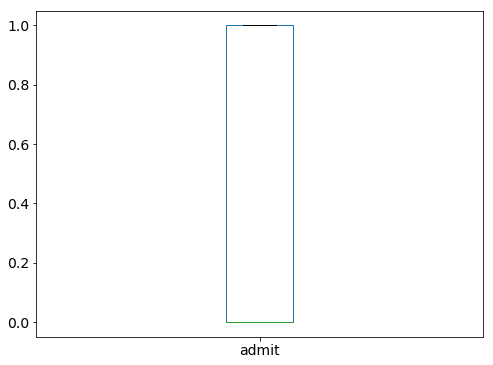

In [20]:
df_raw.admit.plot(kind = "box")

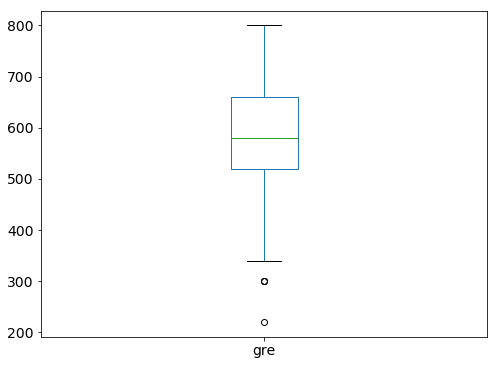

In [21]:
df_raw.gre.plot(kind = "box")

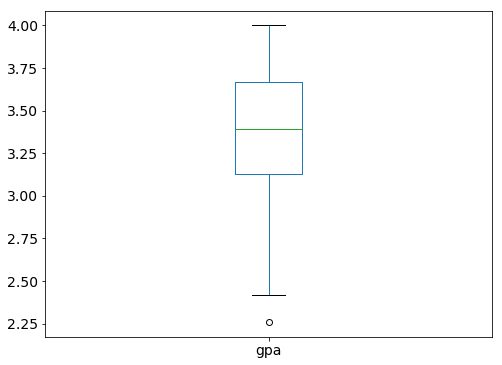

In [22]:
df_raw.gpa.plot(kind = "box")

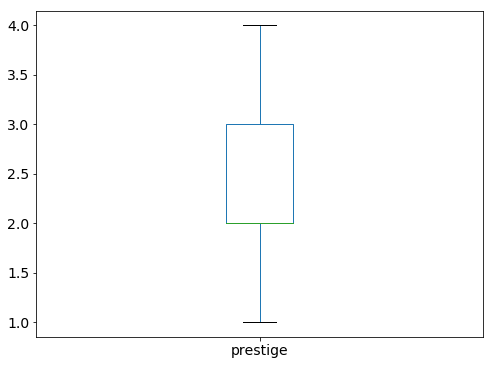

In [23]:
df_raw.prestige.plot(kind = "box")

#### Question 7. What do this plots show?

Answer: The plots show for each variable the quartiles and outliers.

#### Question 8. Describe each distribution 

In [35]:
#1 ADMIT Distribution

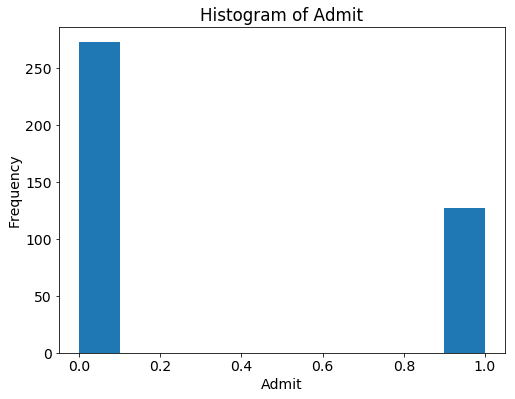

In [46]:
df_raw.admit.plot(kind = "hist" , title = "Histogram of Admit")
plt.xlabel("Admit")
plt.ylabel("Frequency")

In [48]:
df_raw.admit.skew()

0.78705130475868168

In [49]:
#2 GRE Distribution

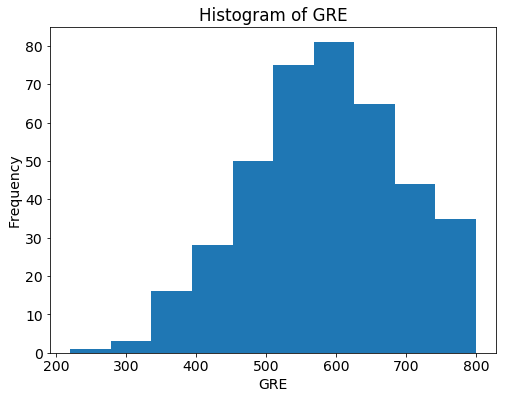

In [40]:
df_raw.gre.plot(kind = "hist" , title = "Histogram of GRE")
plt.xlabel("GRE")
plt.ylabel("Frequency")

In [50]:
df_raw.gre.skew()

-0.15012666594587223

In [ ]:
#3 GPA Distribution

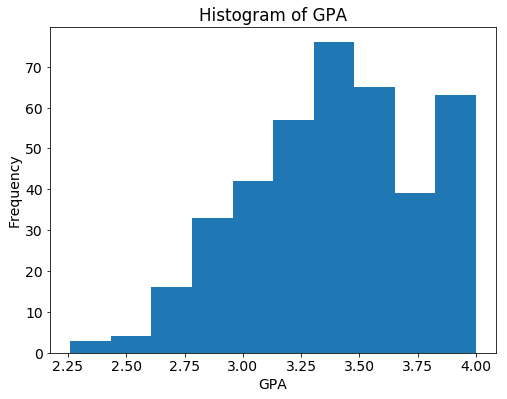

In [42]:
df_raw.gpa.plot(kind = "hist" , title = "Histogram of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")

In [51]:
df_raw.gpa.skew()

-0.21176549033509626

In [52]:
#4 PRESTIGE Distribution

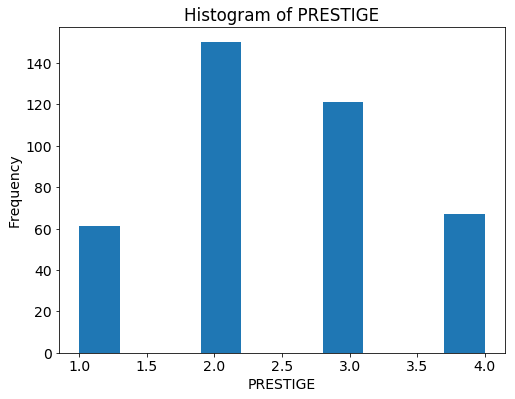

In [27]:
df_raw.prestige.plot(kind = "hist" , title = "Histogram of PRESTIGE")
plt.xlabel("PRESTIGE")
plt.ylabel("Frequency")

In [56]:
df_raw.prestige.skew()

0.093662653553953229

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: By looking at the Histograms and skew values for each variable we can conclude that if the model had an assumption of a normal distribution we would not meet that requirement, because all distrubutions are somewhat skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The square transformation can be used to transform left skewed data to approximately conform to normality.

In [166]:
square_columns = ["gpa"]
df_square = df_raw.copy()
df_square[square_columns] = df_square[square_columns].apply(np.square)

In [167]:
df_square.head()

,admit,gre,gpa,prestige
0,0,380.0,13.0321,3.0
1,1,660.0,13.4689,3.0
2,1,800.0,16.0000,1.0
3,1,640.0,10.1761,4.0
4,0,520.0,8.5849,4.0


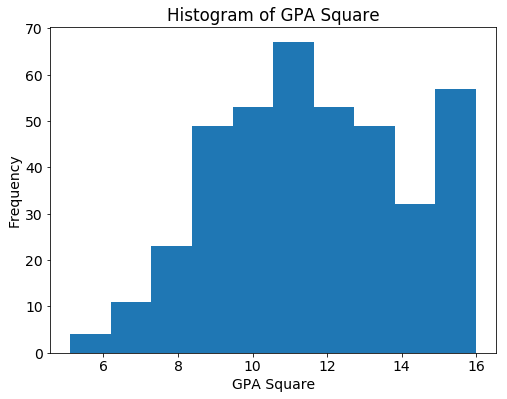

In [164]:
df_square.gpa.plot(kind = "hist" , title = "Histogram of GPA Square")
plt.xlabel("GPA Square")
plt.ylabel("Frequency")

In [168]:
df_square.gpa.skew()

0.015355002094288027

#### Question 11. Which of our variables are potentially colinear? 

In [28]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: Found that there is no hight correlation between any of the variables. The ones that are more correlated are GRE and GPA (0.38).

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Since the two variables are categorical, to explore the association between grad school admissions rates and prestige of undergraduate the first thing to do is to create a dummy variable for PRESTIGE. The next step is to create a logistic regression model that shows me the chances of a student be admitted or not considering it's Prestige score.

#### Question 14. What is your hypothesis? 

Answer: My hypothesis is that undergraduate students with a Prestige score equal or less than 2 have greater chance of being admitted into grad school.

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

In [ ]:
# Knowledge Review Questions

1) Training error is the erros that you get when you run the trained model back on the training data. The Test error is the error you get when you run the model on a set of data that it has never been exposed before.

2) A low training error but a hight test error is caused by Overfitting the model. Some ways to mitigate this situaton are: add more data, reduce complexity and add regularization (dropout, L1/L2)

3) Alphas and Betas

4) One way to find the model with the best fit is to use a cross-validation method like K-fold. A package to do so is sklearn gridsearch. 

5) Regularization is an additive approach to protect models against overfitting. Lasso Regression (L1) add the extra weight to the sum of the absilute of the cofficients. Ridge Regression (L2) add the weight to the sum of the square of the cofficients.

5a) You want to use Lasso when you want less features (sparse model) and Ridge when you want the most Rˆ2 but are okay with more features.